## 1. import

In [1]:
import pandas as pd
import math
import numpy as np
from konlpy.tag import Okt
okt=Okt()
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv("test_data.csv")

In [3]:
df

,date,star_point,comment,photo
0,21.01.15.,5,12월 22일 사전예약으로 구매하여 1월 14일 배송받았습니다.\n예정일보다 제품수...,['https://phinf.pstatic.net/image.nmv/shopnbuy...
1,21.05.02.,3,사용목적은 업무용으로 사용하려고 구매했습니다. 우선 판매자 분이 NVMe 256GB...,['https://shopping-phinf.pstatic.net/20210504_...
2,21.01.27.,5,지난달부터 가볍고 성능좋은 노트북을 구매하기 위해 엄청나게 검색에 검색... 폭풍검...,['https://phinf.pstatic.net/image.nmv/shopnbuy...
3,21.01.15.,5,처음에 1/18일까지 배송해준다고 써있었는데 그때까지 기다리다 목이 빠질 것 같아서...,['https://phinf.pstatic.net/image.nmv/shopnbuy...
4,21.02.03.,5,일단 주문하고 이틀만에 받았습니다.\n4년동안 사용했던 노트북과는 이별을 고하면서\...,['https://phinf.pstatic.net/image.nmv/shopnbuy...
...,...,...,...,...
95,21.01.19.,3,"18일 이후 출고라고 알았으나, 13일에 와서 좋았음. 다른 곳에서 구매한 사람들은...",[]
96,21.04.29.,5,노트북 포장이 간소해서 놀랬어요. 노트북 겉 박스 케이스도 예쁘고 딱 들어있을것만 ...,['https://phinf.pstatic.net/image.nmv/shopnbuy...
97,20.12.18.,5,2020 노트북 시장에서 가장 주목할만한 점은 바로 갤럭시북 이온의 등장이었습니다....,[]
98,21.02.04.,5,노트북을 사기까지 한달 걸렸네요.. 참 힘든 여정이었습니다.\n사전예약이었다면 갤럭...,['https://phinf.pstatic.net/checkout/20210204_...


## 2. Bag of Words Method

In [4]:
negative = df[df["star_point"] <= 2]

In [5]:
neural = df[df["star_point"] == 3]

In [6]:
positive = df[df["star_point"] >= 4]

In [8]:
# corpus = corpus.train[0:500].text
corpus = df["comment"].values

In [9]:
len(corpus) == len(df)

True

In [10]:
pos_tagged = []
for i, sentence in enumerate(corpus):
    dic = {}
    dic["words"] = okt.pos(sentence, norm=True, stem=True)
    if df.loc[i,"star_point"] >= 4:
         dic["sentiment"] = 1
    if df.loc[i,"star_point"] <= 3:
         dic["sentiment"] = -1
    pos_tagged.append(dic)

In [11]:
wordlist = []
for sentence in pos_tagged:
    sentiment = sentence["sentiment"]
    for word in sentence["words"]:
        if word[1] in ["Noun", "Adjective"]:
            wordlist.append(word + (sentiment,))
wordlist[:50]

[('사전예약', 'Noun', 1),
 ('구매', 'Noun', 1),
 ('배송', 'Noun', 1),
 ('예정일', 'Noun', 1),
 ('제품', 'Noun', 1),
 ('수령', 'Noun', 1),
 ('다소', 'Noun', 1),
 ('있다', 'Adjective', 1),
 ('꼼꼼하다', 'Adjective', 1),
 ('포장', 'Noun', 1),
 ('제품', 'Noun', 1),
 ('사용', 'Noun', 1),
 ('결과', 'Noun', 1),
 ('만족하다', 'Adjective', 1),
 ('매장', 'Noun', 1),
 ('업무', 'Noun', 1),
 ('용', 'Noun', 1),
 ('사용', 'Noun', 1),
 ('삼성', 'Noun', 1),
 ('갤럭시', 'Noun', 1),
 ('북', 'Noun', 1),
 ('이온', 'Noun', 1),
 ('를', 'Noun', 1),
 ('구매', 'Noun', 1),
 ('기존', 'Noun', 1),
 ('사용', 'Noun', 1),
 ('맥북프로', 'Noun', 1),
 ('같다', 'Adjective', 1),
 ('인치', 'Noun', 1),
 ('모델', 'Noun', 1),
 ('삼성', 'Noun', 1),
 ('갤럭시', 'Noun', 1),
 ('북', 'Noun', 1),
 ('이온', 'Noun', 1),
 ('비교', 'Noun', 1),
 ('상하좌우', 'Noun', 1),
 ('사이즈', 'Noun', 1),
 ('더', 'Noun', 1),
 ('무게', 'Noun', 1),
 ('있다', 'Adjective', 1),
 ('또한', 'Noun', 1),
 ('윈도우', 'Noun', 1),
 ('전용', 'Noun', 1),
 ('모델', 'Noun', 1),
 ('아니다', 'Adjective', 1),
 ('사용', 'Noun', 1),
 ('불편하다', 'Adjective', 1),
 ('점', 'Noun

In [12]:
word2index={}
bow = []
for word in wordlist:
    if word not in word2index.keys():
        word2index[word]=len(word2index)
        bow.append([word, 1])
    else:
        index=word2index.get(word)
        bow[index] = [word, bow[index][1]+1]

In [13]:
wordlist = sorted(bow, key=lambda word: word[1], reverse=True)   

In [14]:
pos_wordlist = [word for word in wordlist if word[0][2] == 1]
neg_wordlist = [word for word in wordlist if word[0][2] == -1]

In [15]:
# stopwords = ['고기', '정말', '너무', '진짜', '이다', '구매', '같다', '아직']
stopwords = ['노트북', '있다', '같다', '없다', '이다', '아니다', '그렇다']

In [23]:
# toberemoved = ["Punctuation", "Josa", "Modifier", "Number", "Suffix", "Determiner", "VerbPrefix", "Alpha", "Verb"]
clean = ["Noun", "Adjective"]
pos_result = []
for word in pos_wordlist:
    if word[0][1] in clean and len(word[0][0]) > 1 and word[0][0] not in stopwords and word[1] > 5:
#         if(word[0][0] == "가성"): word[0] = ("가성비", "Noun", 1)
        pos_result.append(word)
pos_result = pos_result[:20]

In [22]:
# toberemoved = ["Punctuation", "Josa", "Modifier", "Number", "Suffix", "Determiner", "VerbPrefix", "Alpha", "Verb"]
neg_result = []
for word in neg_wordlist:
    if word[0][1] in clean and len(word[0][0]) > 1 and word[0][0] not in stopwords:
        neg_result.append(word)
neg_result = neg_result[:20]

In [24]:
result = pos_result + neg_result

In [25]:
object_list = []
for word in result:
    tmp = {}
    tmp["text"]=word[0][0]
    tmp["value"]=round((math.log(word[1]) * 20), 3)
    tmp["sentiment"] = word[0][2]
    object_list.append(tmp)
object_list = [item for item in object_list if item['value'] > 5]
object_list

[{'text': '좋다', 'value': 101.125, 'sentiment': 1},
 {'text': '이온', 'value': 95.916, 'sentiment': 1},
 {'text': '사용', 'value': 90.217, 'sentiment': 1},
 {'text': '가볍다', 'value': 87.641, 'sentiment': 1},
 {'text': '구매', 'value': 83.178, 'sentiment': 1},
 {'text': '갤럭시', 'value': 83.178, 'sentiment': 1},
 {'text': '제품', 'value': 81.551, 'sentiment': 1},
 {'text': '성능', 'value': 79.78, 'sentiment': 1},
 {'text': '생각', 'value': 77.003, 'sentiment': 1},
 {'text': '배송', 'value': 76.133, 'sentiment': 1},
 {'text': '빠르다', 'value': 74.271, 'sentiment': 1},
 {'text': '삼성', 'value': 73.778, 'sentiment': 1},
 {'text': '화면', 'value': 73.271, 'sentiment': 1},
 {'text': '디자인', 'value': 72.218, 'sentiment': 1},
 {'text': '고민', 'value': 71.107, 'sentiment': 1},
 {'text': '무게', 'value': 70.527, 'sentiment': 1},
 {'text': '정도', 'value': 70.527, 'sentiment': 1},
 {'text': '처음', 'value': 70.527, 'sentiment': 1},
 {'text': '이번', 'value': 69.315, 'sentiment': 1},
 {'text': '만족하다', 'value': 68.68, 'sentiment':

## 3. Result

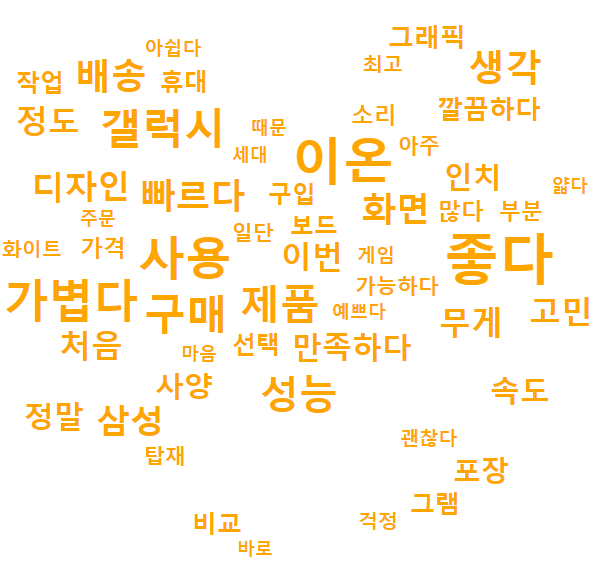

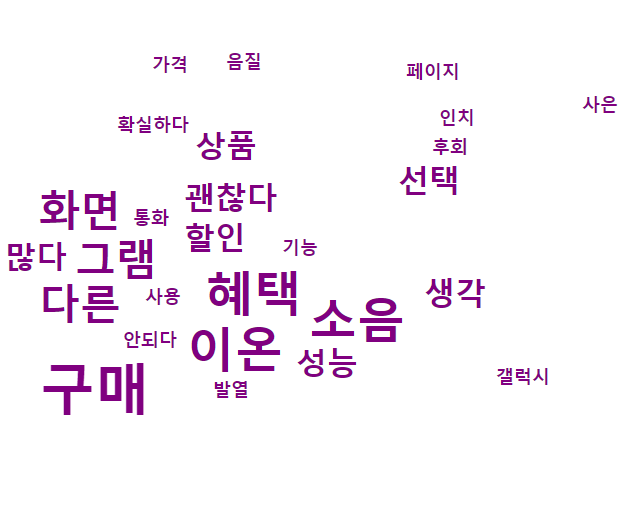